In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
bike = pd.read_csv("day.csv")

In [8]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bike.shape

(730, 16)

In [10]:
# Understanding the feature names in the dataset
print(bike.columns)
bike.dtypes.value_counts()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


int64      11
float64     4
object      1
Name: count, dtype: int64

In [11]:
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [12]:
# Getting insights of the features
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.
print(bike['season'].value_counts())
# 1=spring
bike.loc[(bike['season'] == 1) , 'season'] = 'spring'

# 2=summer
bike.loc[(bike['season'] == 2) , 'season'] = 'summer'

# 3=fall
bike.loc[(bike['season'] == 3) , 'season'] = 'fall'

# 4=winter
bike.loc[(bike['season'] == 4) , 'season'] = 'winter'

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64


In [14]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
bike['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [15]:
# year (0: 2018, 1:2019)
bike['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [16]:
print(bike['mnth'].astype('category').value_counts())
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
bike[['mnth']] = bike[['mnth']].apply(object_map)

mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64


In [17]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
bike['mnth'].astype('category').value_counts(ascending = True)

mnth
Feb     56
Apr     60
Jun     60
Nov     60
Sept    60
Jan     62
Dec     62
Aug     62
Mar     62
Jul     62
May     62
Oct     62
Name: count, dtype: int64

In [18]:
# whether day is a holiday or not (0: No, 1: Yes)
bike['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [19]:
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thur', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'})

# Applying the function to the two columns
bike[['weekday']] = bike[['weekday']].apply(str_map)

In [20]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
bike['weekday'].astype('category').value_counts()

weekday
Mon     105
Tue     105
Wed     105
Thur    104
Sat     104
Sun     104
Fri     103
Name: count, dtype: int64

In [21]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
bike['workingday'].astype('category').value_counts()


workingday
1    499
0    231
Name: count, dtype: int64

In [22]:

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bike.loc[(bike['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bike.loc[(bike['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bike.loc[(bike['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike.loc[(bike['weathersit'] == 4) , 'weathersit'] = 'D'

In [23]:
# Extracting the type of weather situations present in the data
print(bike['weathersit'].unique())
print(bike['weathersit'].astype('category').value_counts(ascending = True))

['B' 'A' 'C']
weathersit
C     21
B    246
A    463
Name: count, dtype: int64


In [26]:
import pandas as pd

print("As is:", bike['dteday'].dtypes)

# Option 1 (explicit astype)
bike['dteday'] = bike['dteday'].astype('datetime64[ns]')

# OR Option 2 (recommended)
bike['dteday'] = pd.to_datetime(bike['dteday'])

print("Now:", bike['dteday'].dtypes)


As is: object
Now: datetime64[ns]


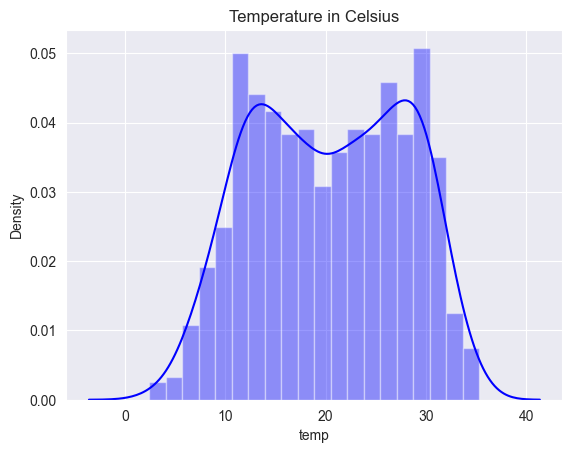

In [27]:
# temp: temperature in Celsius
sns.set_style("darkgrid")
sns.distplot(bike['temp'],bins = 20, color = 'b').set(title='Temperature in Celsius')
plt.show()

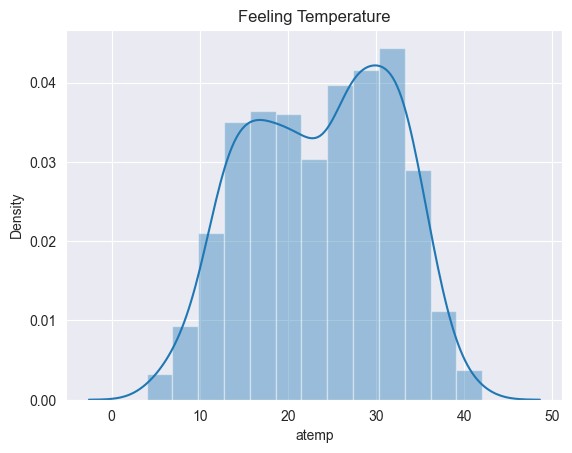

In [28]:
# feeling temperature
sns.distplot(bike['atemp']).set(title='Feeling Temperature')
plt.show()


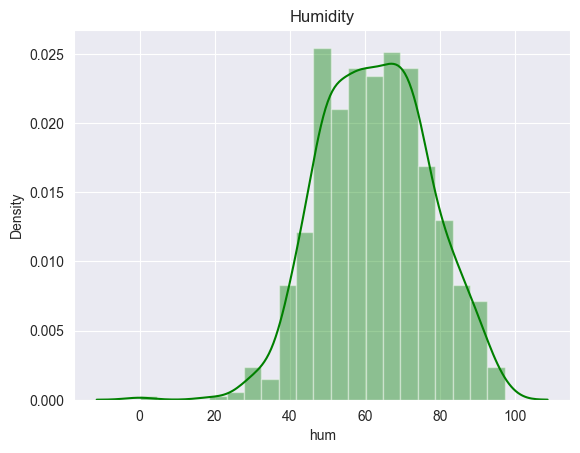

In [29]:
# humidity
sns.distplot(bike['hum'], color = 'g').set(title='Humidity')
plt.show()

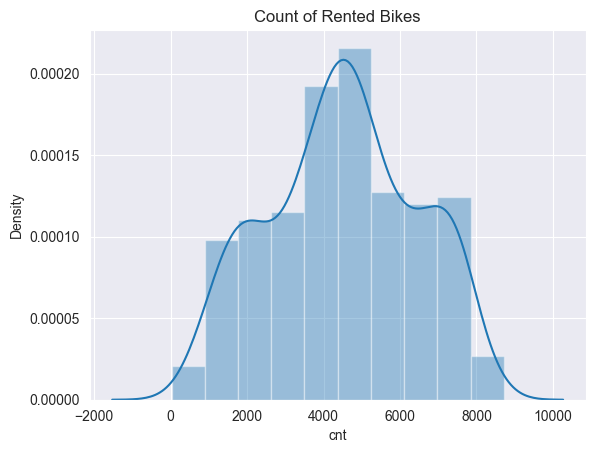

In [30]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(bike['cnt'], bins = 10).set(title='Count of Rented Bikes')
plt.show()

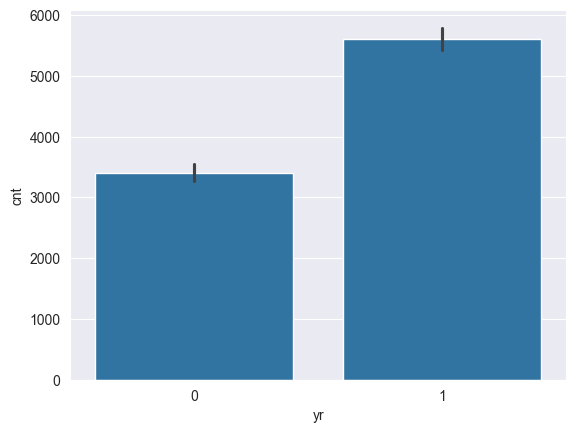

In [32]:
# 0: 2018, 1: 2019
sns.barplot(x='yr', y='cnt', data=bike)
plt.show()

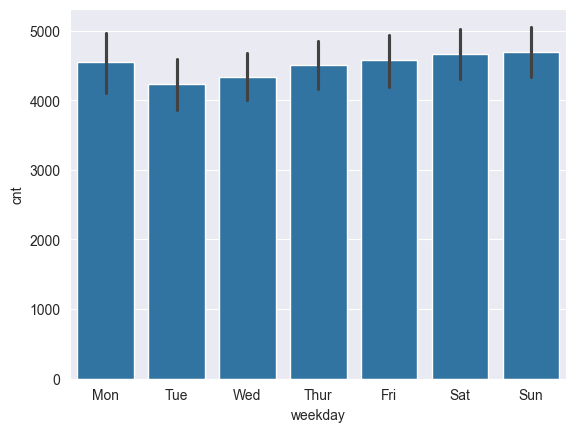

In [33]:
sns.barplot(x='weekday', y='cnt', data=bike)
plt.show()

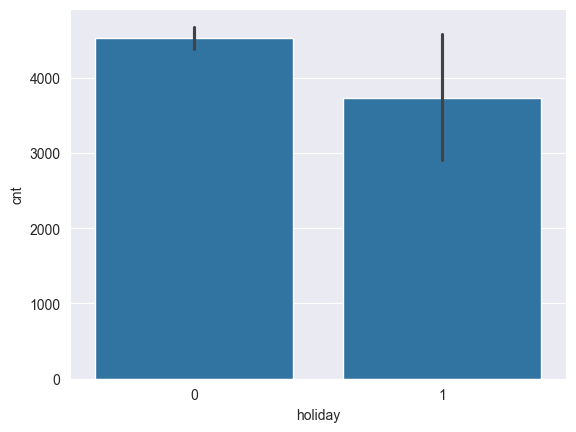

In [34]:
# Holiday - 0: No, 1: Yes
sns.barplot(x='holiday', y='cnt', data=bike)
plt.show()

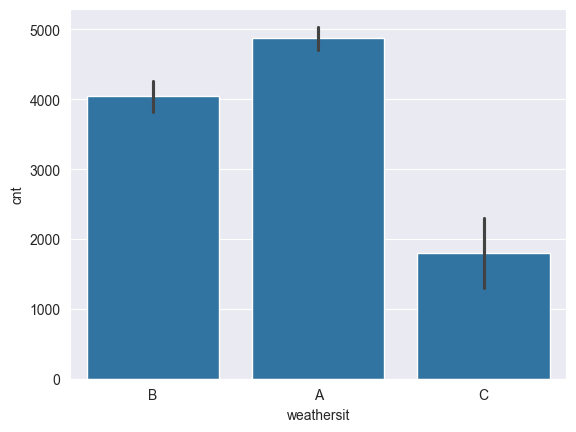

In [35]:
# weathersit
# 'A'- Clear, Few clouds, Partly cloudy, Partly cloudy
# 'B'- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 'C'- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 'D'- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

sns.barplot(x='weathersit', y='cnt', data=bike)
plt.show()

In [36]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [37]:
# All categorical variables in the dataset
bike_categorical = bike.select_dtypes(exclude=['float64','datetime64','int64'])
print("Only categorical varibales:", bike_categorical.columns)

Only categorical varibales: Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [40]:
bike.dtypes.value_counts()

int64             7
object            4
float64           4
datetime64[ns]    1
Name: count, dtype: int64

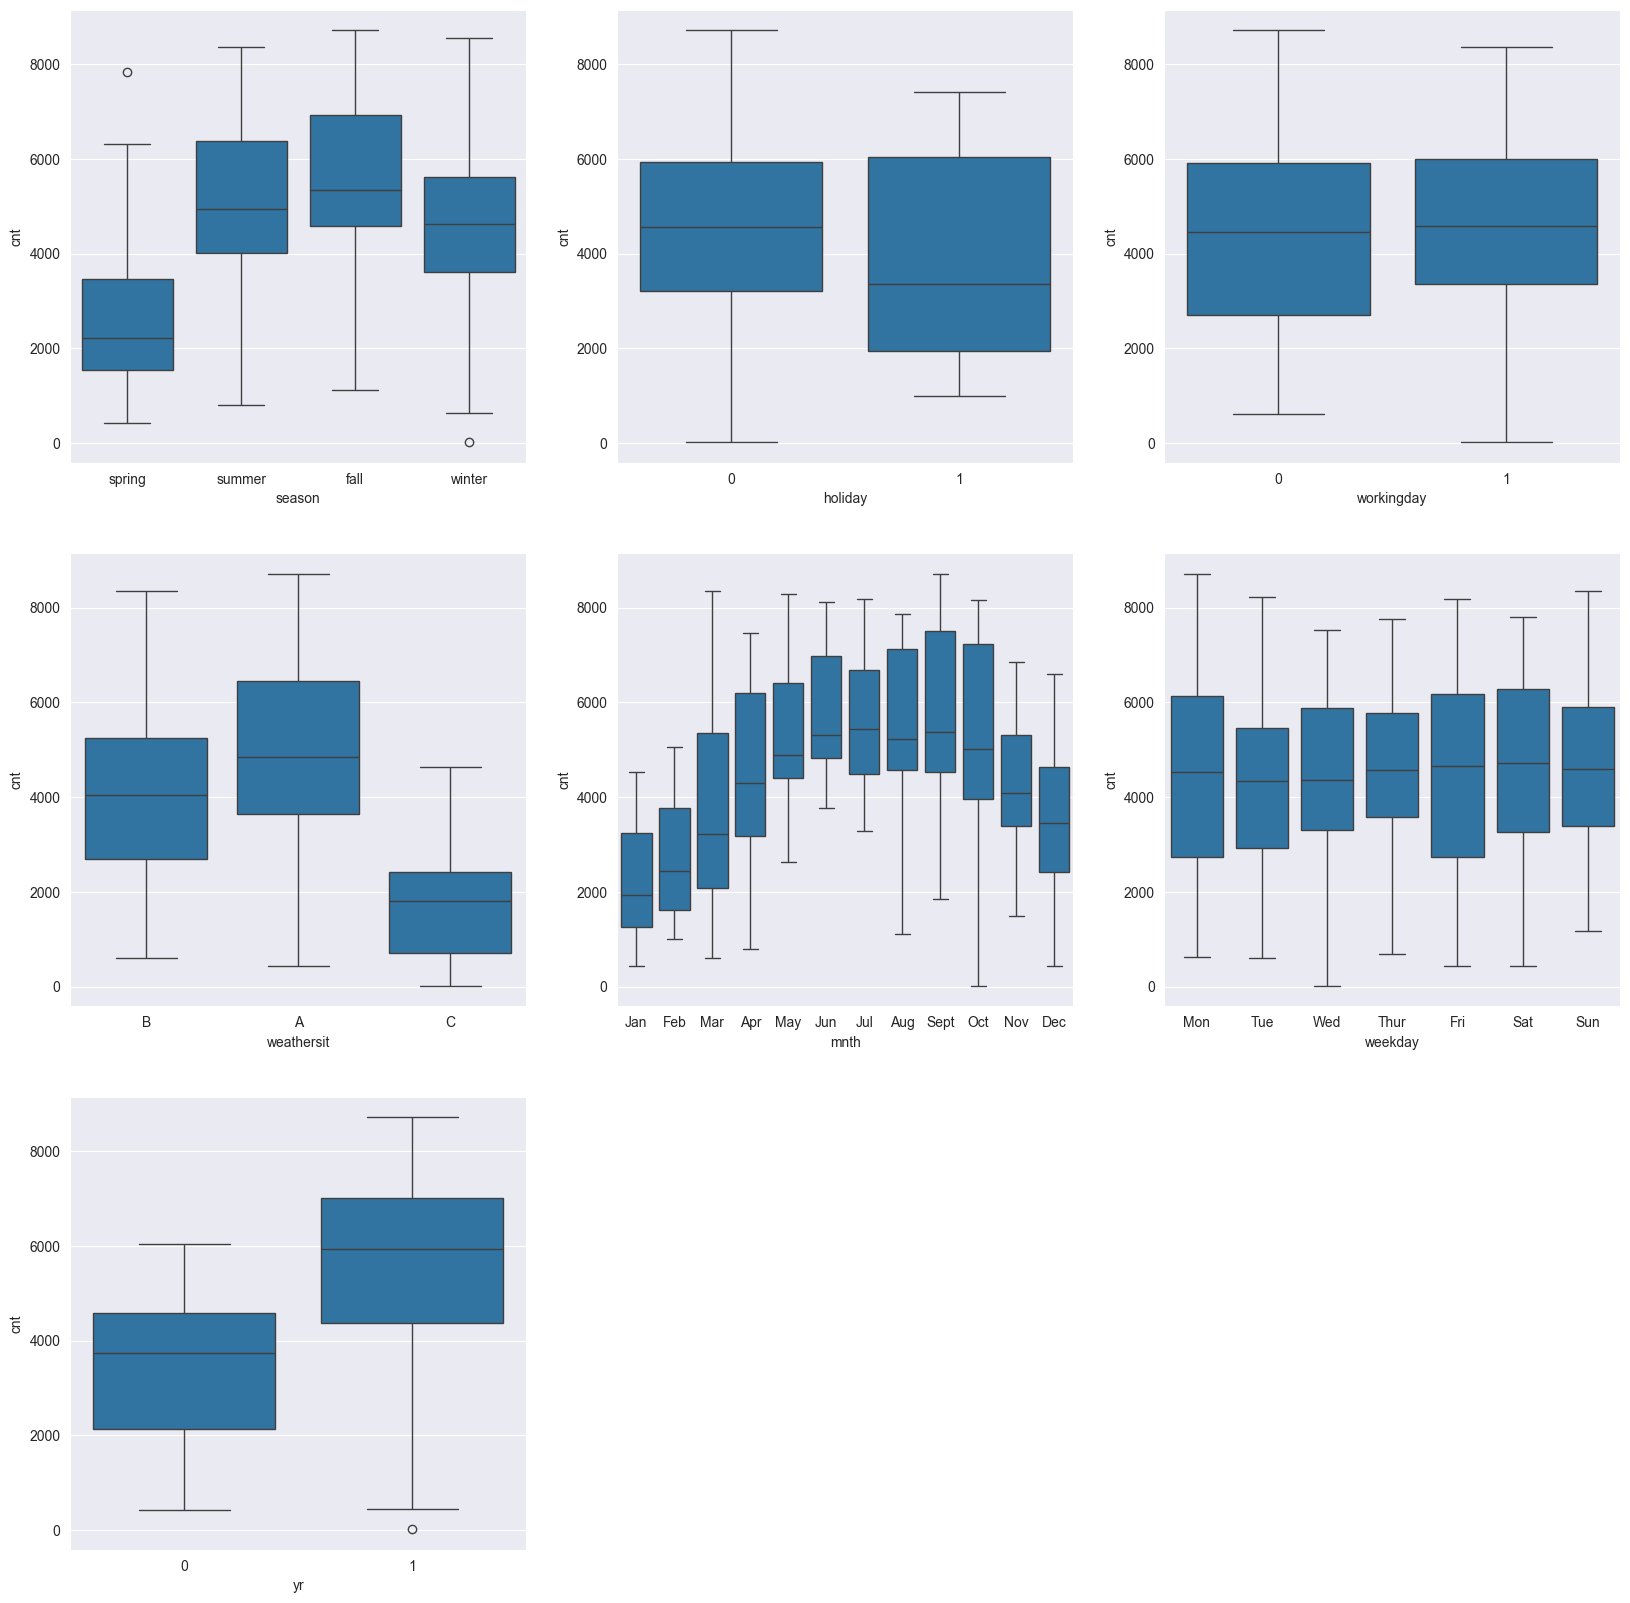

In [41]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

In [42]:
# Converting "casual","registered" and "cnt" Integer/discreate variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
Int_Var_List = ["casual","registered","cnt"]

for var in Int_Var_List:
    bike[var] = bike[var].astype("float")
bike[Int_Var_List].head(3)

,casual,registered,cnt
0,331.0,654.0,985.0
1,131.0,670.0,801.0
2,120.0,1229.0,1349.0


In [43]:
# All numeric variables in the dataset
bike_numeric = bike.select_dtypes(include=['float64'])
bike_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [44]:
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green',  ])

def modified_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)
    

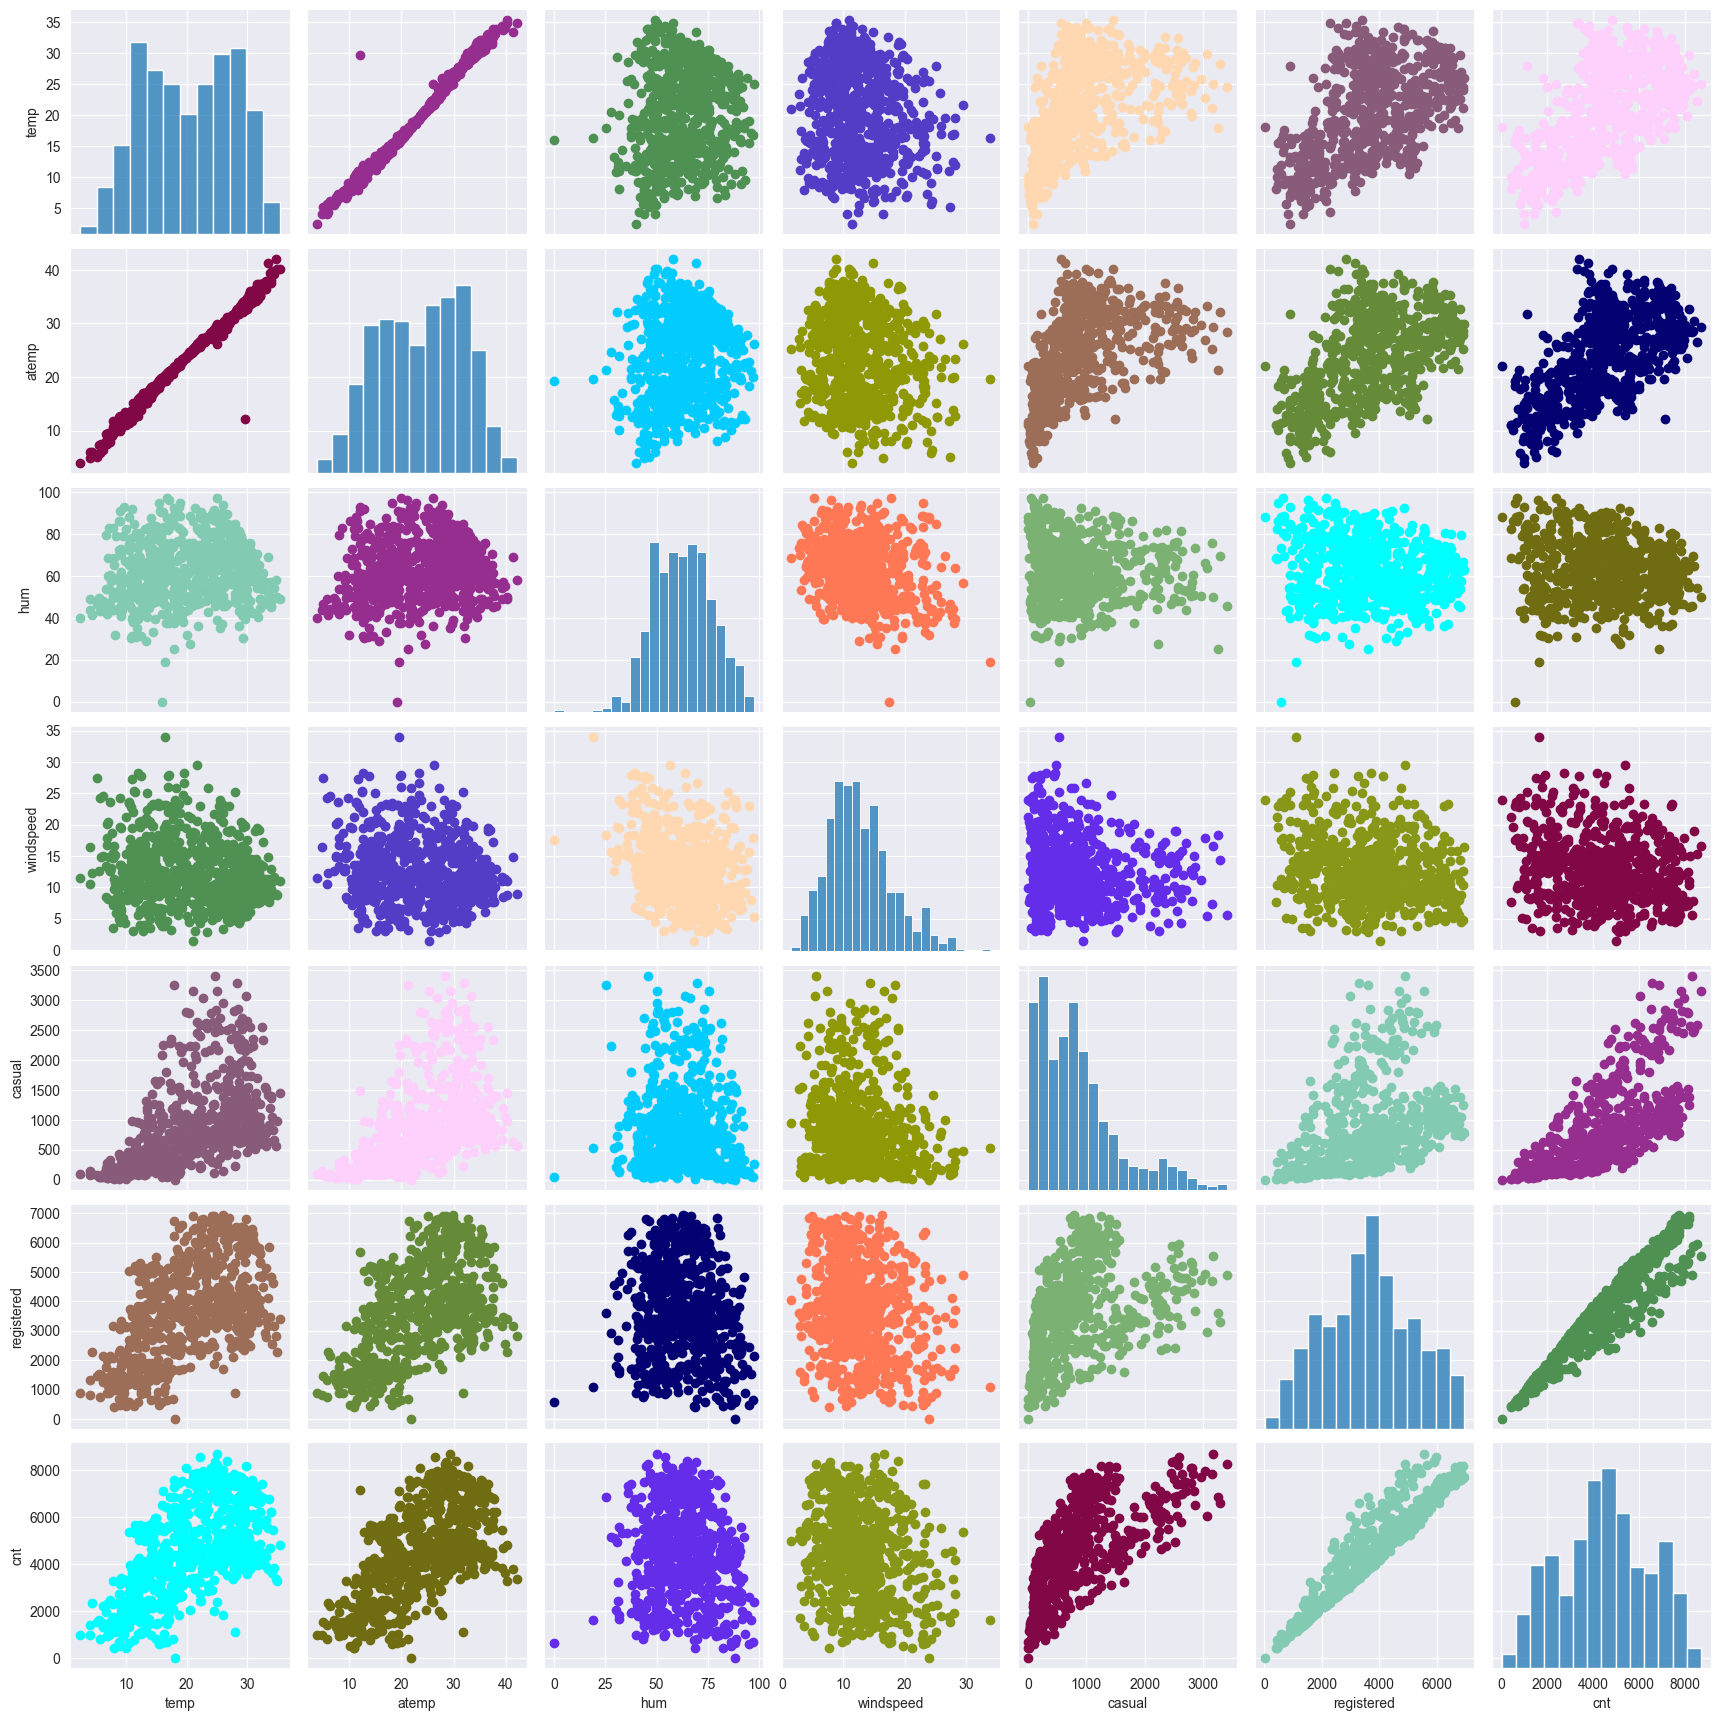

In [45]:
# Pairwise scatter plot
g = sns.pairplot(bike_numeric)

g.map_offdiag(modified_scatter)
plt.show()


In [46]:
# Correlation matrix
cor = bike_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

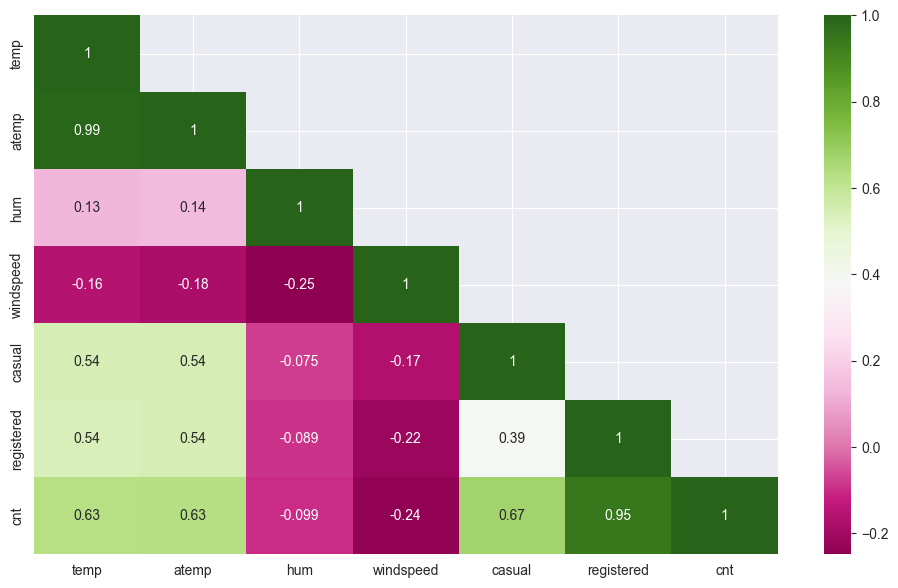

In [47]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,7)
sns.heatmap(cor, mask=mask, cmap = 'PiYG', annot=True)

In [48]:
#removing atemp as it is highly correlated with temp
bike.drop('atemp',axis=1,inplace=True)    

In [49]:
print(bike.shape)
print(bike.dtypes.value_counts())

(730, 15)
float64           6
int64             4
object            4
datetime64[ns]    1
Name: count, dtype: int64


In [50]:
# Subset all categorical variables
bike_categorical=bike.select_dtypes(include=['object'])
bike_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tue,B
2,spring,Jan,Wed,A
3,spring,Jan,Thur,A
4,spring,Jan,Fri,A


In [51]:
# Convert into dummies
bike_dummies = pd.get_dummies(bike_categorical, drop_first=True)
bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
bike_dummies.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [53]:
# This code block display how the data has been encoded in dummy variables.
# For weathersit A, where no variables has been created, the value under weathersit_B and weathersit_C will be both 0.
pd.set_option('display.max_columns', None)
print(bike.iloc[25:27])
print("----------------------------------------")
print(bike_dummies.iloc[25:27])

    instant     dteday  season  yr mnth  holiday weekday  workingday  \
25       26 2018-01-26  spring   0  Jan        0     Fri           1   
26       27 2018-01-27  spring   0  Jan        0     Sat           1   

   weathersit    temp    hum  windspeed  casual  registered    cnt  
25          C  8.9175  86.25  19.687950    34.0       472.0  506.0  
26          A  7.9950  68.75   7.627079    15.0       416.0  431.0  
----------------------------------------
    season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
25           True          False          False     False     False     False   
26           True          False          False     False     False     False   

    mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  \
25      True     False     False     False     False     False     False   
26      True     False     False     False     False     False     False   

    mnth_Sept  weekday_Mon  weekday_Sat  weekday_Sun  weekday_

In [54]:
# Drop categorical variable columns
bike = bike.drop(list(bike_categorical.columns), axis=1)

In [55]:
# Concatenate dummy variables with the original dataframe
bike = pd.concat([bike, bike_dummies], axis=1)

In [56]:
# Let's check the first few rows
bike.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
# Check Column 'instant'[Record Index] and 'dteday'[Date]

print(len(bike.instant.unique()))
print(len(bike.dteday.unique()))

730
730


In [59]:
print(bike.head(3))

   yr  holiday  workingday       temp      hum  windspeed  casual  registered  \
0   0        0           0  14.110847  80.5833  10.749882   331.0       654.0   
1   0        0           0  14.902598  69.6087  16.652113   131.0       670.0   
2   0        0           1   8.050924  43.7273  16.636703   120.0      1229.0   

      cnt  season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
0   985.0           True          False          False     False     False   
1   801.0           True          False          False     False     False   
2  1349.0           True          False          False     False     False   

   mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  \
0     False      True     False     False     False     False     False   
1     False      True     False     False     False     False     False   
2     False      True     False     False     False     False     False   

   mnth_Oct  mnth_Sept  weekday_Mon  weekday_Sat  weekday_Sun

In [60]:
# Before splitting, make a copy of the cleaned data frame
bike_c = bike.copy()
print(bike.shape)
print(bike_c.shape)

(730, 31)
(730, 31)


In [61]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
print(df_train.shape)
df_train.head(10)

(510, 31)


,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
111,0,0,1,13.803347,72.9583,14.707907,177.0,1506.0,1683.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
580,1,0,0,32.526653,61.3333,17.249686,2345.0,4479.0,6824.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
500,1,0,1,26.103347,69.7917,8.208304,991.0,6433.0,7424.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
479,1,0,1,19.543347,42.7917,7.959064,655.0,5541.0,6196.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
472,1,0,1,18.996653,56.9167,11.250104,347.0,4020.0,4367.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [63]:
from sklearn.preprocessing import MinMaxScaler 
# from sklearn.preprocessing import StandardScaler - in case you want to use Standardization method

In [64]:
scaler = MinMaxScaler()

In [65]:
bike_numeric.columns  # created in previous section

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [66]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [67]:
df_train[var].describe()

,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
yr,1.000000,-0.014980,0.031808,0.107288,-0.084792,-0.001108,0.258113,0.620281,0.591508,-0.036320,0.013856,-0.022638,0.054774,-0.040049,-1.991603e-02,-1.179424e-02,0.017623,0.010484,-0.005172,-0.025933,-0.018790,-0.018790,0.002574,-0.033817,-6.153420e-03,-0.011876,-0.000296,-0.000812,0.053634,-0.015469,-6.076399e-02
holiday,-0.014980,1.000000,-0.233863,-0.066282,-0.029093,0.017569,-0.008513,-0.114898,-0.095961,0.053339,-0.063232,0.050712,-0.052728,-0.004302,5.652428e-02,3.741163e-02,-0.046539,-0.045890,-0.053321,-0.049076,0.127543,-0.005387,0.043692,-0.069242,9.759407e-03,-0.024505,-0.062897,-0.066102,0.279279,-0.038279,-2.815377e-02
workingday,0.031808,-0.233863,1.000000,0.067787,0.031989,-0.043176,-0.503783,0.329512,0.092320,-0.037932,0.043274,-0.057297,0.040575,-0.031500,-1.680257e-02,-2.129625e-02,-0.006030,0.004694,0.030677,0.059006,-0.041271,-0.041271,0.019495,-0.619074,2.465943e-01,0.251739,0.268948,-0.591001,0.174565,0.040766,2.115873e-02
temp,0.107288,-0.066282,0.067787,1.000000,0.155415,-0.187396,0.555811,0.557199,0.643517,-0.605988,0.125582,-0.233697,0.387456,-0.272869,-2.960214e-01,-4.467239e-01,0.413929,0.302997,-0.179694,0.155415,-0.194765,-0.018709,0.207457,-0.042274,2.826576e-03,0.015943,0.046646,-0.017048,-0.032126,-0.090161,-3.609266e-02
hum,-0.084792,-0.029093,0.031989,0.155415,1.000000,-0.266895,-0.044405,-0.055116,-0.059993,-0.201134,-0.013216,0.171579,0.053185,0.057832,-1.295442e-01,-7.165160e-02,-0.053838,-0.095033,-0.110761,0.145604,0.004910,0.162014,0.152628,-0.040521,-3.822174e-02,-0.016161,0.010123,0.012224,0.022612,0.481042,2.450381e-01
windspeed,-0.001108,0.017569,-0.043176,-0.187396,-0.266895,1.000000,-0.183926,-0.234840,-0.253794,0.180743,0.110089,-0.090649,-0.111243,-0.060975,1.331228e-01,6.793368e-03,-0.085478,-0.035012,0.142173,-0.034137,0.009952,-0.018973,-0.121734,0.049356,-4.353283e-03,-0.015764,-0.005849,-0.001221,-0.004372,-0.030385,8.689990e-02
casual,0.258113,-0.008513,-0.503783,0.555811,-0.044405,-0.183926,1.000000,0.400955,0.670830,-0.418754,0.195134,-0.092844,0.174407,-0.206286,-2.342088e-01,-3.014498e-01,0.166083,0.179250,-0.061296,0.109852,-0.112408,0.069604,0.137720,0.358713,-1.513652e-01,-0.063411,-0.146469,0.306204,-0.129180,-0.154657,-1.586489e-01
registered,0.620281,-0.114898,0.329512,0.557199,-0.055116,-0.234840,0.400955,1.000000,0.948361,-0.498905,0.082490,0.080025,0.206097,-0.089154,-2.337073e-01,-3.382174e-01,0.123907,0.155345,-0.143680,0.092635,-0.011377,0.051378,0.189791,-0.173454,7.673453e-02,0.057486,0.102030,-0.209264,0.043452,-0.150680,-2.120571e-01
cnt,0.591508,-0.095961,0.092320,0.643517,-0.059993,-0.253794,0.670830,0.948361,1.000000,-0.548871,0.134343,0.032636,0.227229,-0.143598,-2.702870e-01,-3.781731e-01,0.157812,0.187821,-0.137537,0.113027,-0.048130,0.065692,0.201327,-0.016215,9.709936e-03,0.024581,0.031883,-0.063385,-0.009552,-0.175530,-2.265984e-01
season_spring,-0.036320,0.053339,-0.037932,-0.605988,-0.201134,0.180743,-0.418754,-0.498905,-0.548871,1.000000,-0.322955,-0.326377,-0.184784,0.041868,4.715403e-01,5.488613e-01,-0.163094,-0.160819,0.305009,-0.171986,-0.174161,-0.174161,-0.167580,0.022641,6.274901e-03,0.016394,-0.030988,0.003276,-0.009212,0.013970,-4.455809e-02


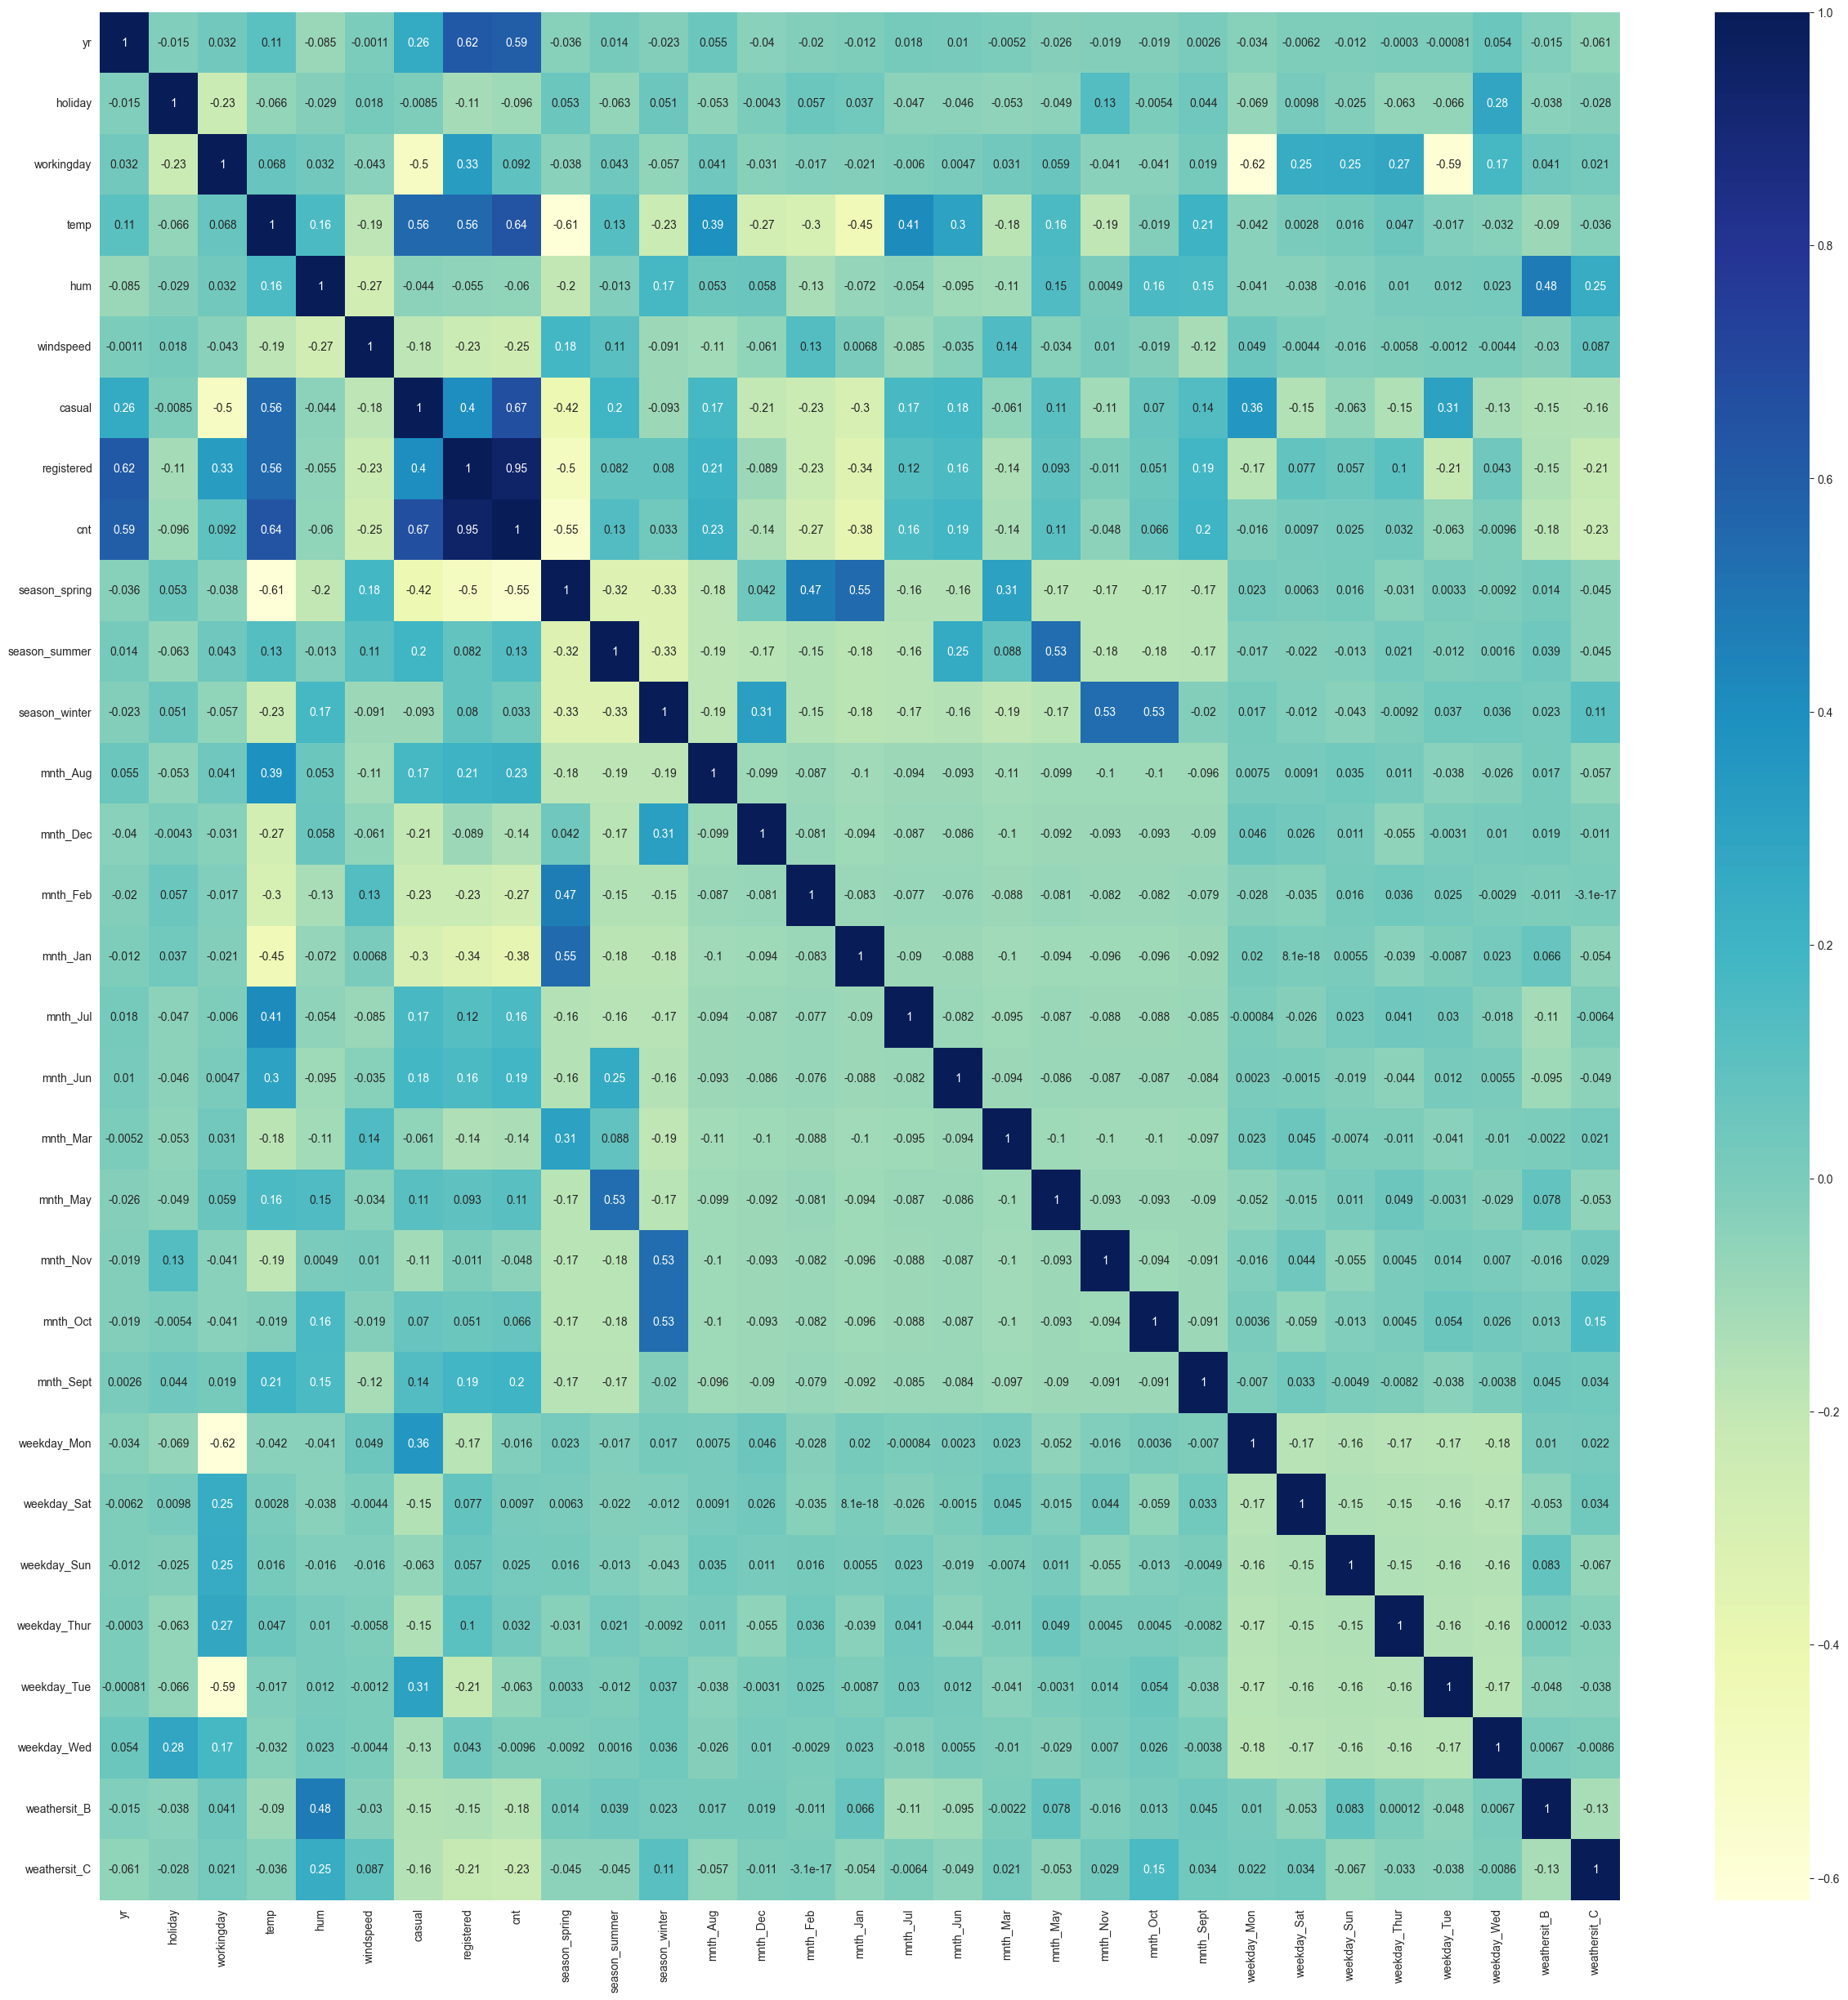

In [70]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [71]:
df_corr = df_train.corr(method="pearson")

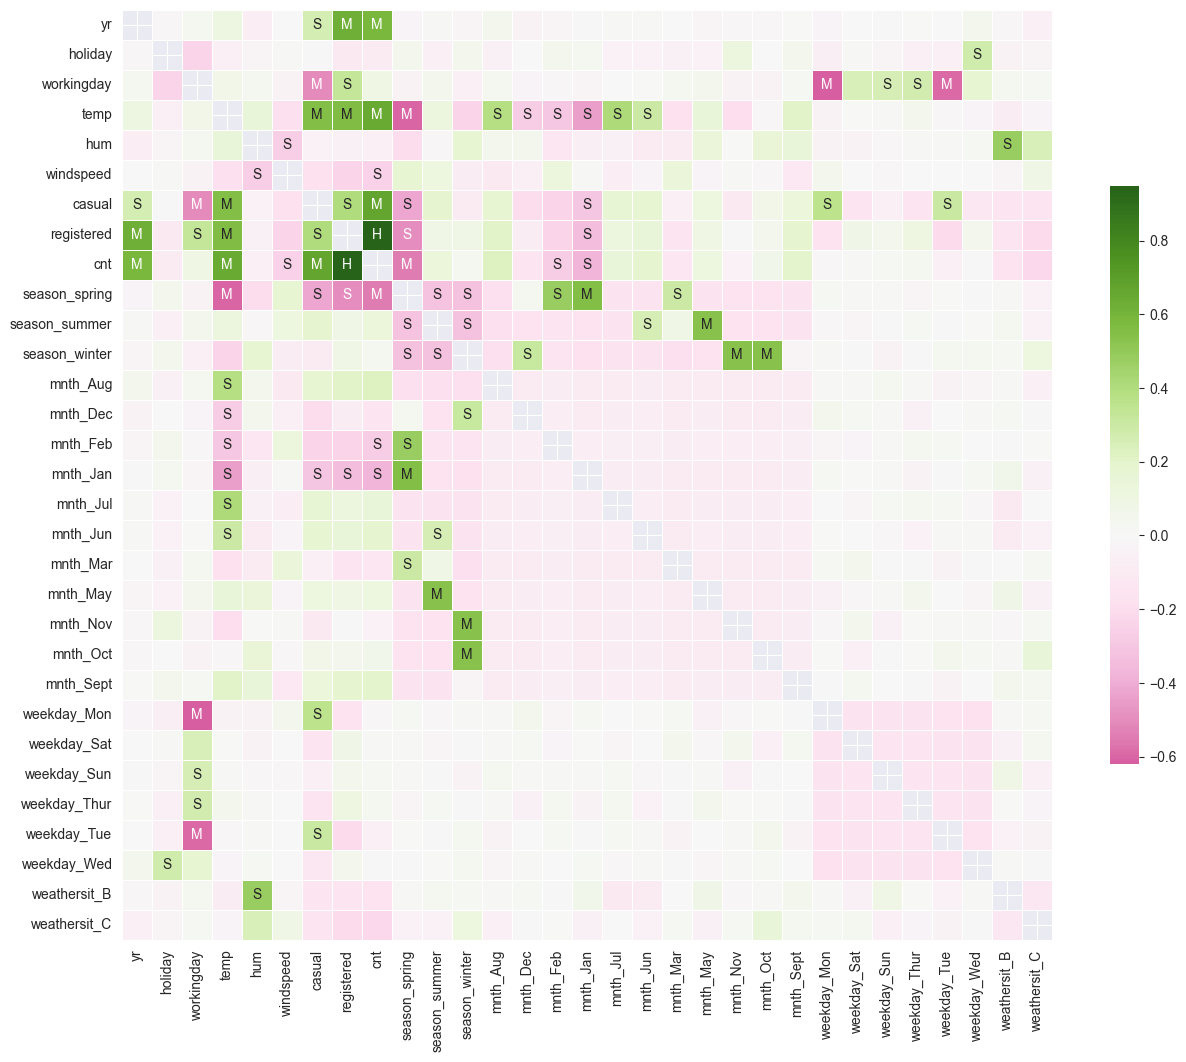

In [72]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "H",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "S", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="PiYG", cbar_kws={"shrink": 0.5});


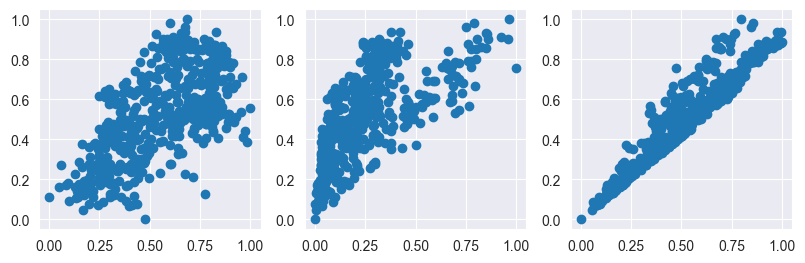

In [73]:
plt.figure(figsize=(20, 20)) 

plt.subplot(6,6,1)
plt.scatter(df_train.temp, df_train.cnt)

plt.subplot(6,6,2)
plt.scatter(df_train.casual, df_train.cnt)

plt.subplot(6,6,3)
plt.scatter(df_train.registered, df_train.cnt)
plt.show()

In [74]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [75]:
print(X_train.shape)
X_train.head()

(510, 28)


,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False


In [76]:
y_train.shape

(510,)

In [78]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.6 MB 3.5 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.6 MB 4.3 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 4.4 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.6 MB 4.9 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 5.2 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 5.4 MB/s  0:00:01

   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
 

In [80]:
import statsmodels.api as sm
import numpy as np

# Ensure numeric types
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Drop rows with NaNs (if any got introduced)
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # keep aligned

# Add constant term for intercept
X_train_lm = sm.add_constant(X_train)

# Fit OLS model
lr_model1 = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

print(lr_model1.params)


const            0.242930
yr               0.232116
holiday          0.006726
workingday       0.093651
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon      0.098544
weekday_Sat     -0.003849
weekday_Sun      0.005388
weekday_Thur    -0.013502
weekday_Tue      0.044008
weekday_Wed     -0.015519
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64


In [81]:
# Creating a model using sklearn Linear Regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23211572 -0.05400605  0.03291909  0.45056169 -0.15134004 -0.18645332
 -0.04815901  0.03872462  0.10584692  0.01440398 -0.0455859  -0.03228181
 -0.06277659 -0.04035007 -0.00297239  0.00104515  0.02393995 -0.04185131
  0.00753359  0.0810599   0.03781128 -0.00384924  0.00538751 -0.01350234
 -0.01672432 -0.01551922 -0.0610664  -0.25744279]
0.3036618770529772


In [83]:
# getting the model summary from statsmodel
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 26 Aug 2025   Prob (F-statistic):          8.74e-182
Time:                        20:47:50   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.035      6.854      0.000       0.173       0.313
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0067      0.024      0.278      0.781      -0.041       0.054
workingday        0.0937      0.012      7.783      0.000       0.070       0.117
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon       0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat      -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun       0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thur     -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tue       0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed      -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     8.45e+15
================================================================

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)
rfe1.fit(X_train, y_train)

print(rfe1.support_)
print(rfe1.ranking_)


[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  7  8  1  1]


In [86]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sept,weekday_Mon,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,False,False,True,False,False,False,False,False,False
576,1.0,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,True,False,False,False,False
426,1.0,1,0,0,0.442393,0.640189,0.255342,True,False,False,False,False,False,True,True,False
728,1.0,1,0,0,0.245101,0.498067,0.663106,True,False,False,False,False,False,False,False,False
482,1.0,1,0,0,0.395666,0.504508,0.188475,False,True,False,False,False,False,True,True,False


In [88]:
import statsmodels.api as sm
import pandas as pd

# Ensure X and y are numeric
X_train_rfe1 = X_train_rfe1.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Drop rows with NaN (if introduced by coercion)
mask = X_train_rfe1.notnull().all(axis=1) & y_train.notnull()
X_train_rfe1 = X_train_rfe1.loc[mask]
y_train = y_train.loc[mask]

# Add constant
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fit OLS
lm1 = sm.OLS(y_train.astype(float), X_train_rfe1.astype(float)).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 26 Aug 2025   Prob (F-statistic):          2.31e-191
Time:                        20:50:49   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
a=X_train_rfe1.drop('const',axis=1)


In [92]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Keep only numeric columns
a = a.select_dtypes(include=['number'])

# Create VIF dataframe
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by="VIF", ascending=False)

print(vif)


     Features   VIF
4         hum  8.75
3        temp  6.40
5   windspeed  3.45
2  workingday  3.12
0          yr  2.01
1     holiday  1.07


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=8)

rfe2.fit(X_train, y_train)

print(rfe2.support_)
print(rfe2.ranking_)


[ True  True False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  1  7  1  1  1  1  5  2 13 10 11  8  1 20 21 12  9 17  3  6 19 18 16
 14 15  4  1]


In [95]:
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,False,False,False
576,1.0,1,0,0.815169,0.725633,0.264686,False,True,False
426,1.0,1,0,0.442393,0.640189,0.255342,True,False,False
728,1.0,1,0,0.245101,0.498067,0.663106,True,False,False
482,1.0,1,0,0.395666,0.504508,0.188475,False,False,False


In [97]:
import statsmodels.api as sm
import pandas as pd

# Ensure only numeric dtypes
X_train_rfe2 = X_train_rfe2.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Drop rows with NaN (if any introduced)
mask = X_train_rfe2.notnull().all(axis=1) & y_train.notnull()
X_train_rfe2 = X_train_rfe2.loc[mask]
y_train = y_train.loc[mask]

# Add constant term for intercept
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fit model
lm2 = sm.OLS(y_train.astype(float), X_train_rfe2.astype(float)).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.0
Date:                Tue, 26 Aug 2025   Prob (F-statistic):          8.21e-179
Time:                        20:55:14   Log-Likelihood:                 470.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     501   BIC:                            -884.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4318      0.030     14.567

In [98]:
b=X_train_rfe2.drop('const',axis=1)

In [100]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Keep only numeric columns
b_num = b.select_dtypes(include=['number'])

# Create VIF dataframe
vif = pd.DataFrame()
vif['Features'] = b_num.columns
vif['VIF'] = [variance_inflation_factor(b_num.values, i) for i in range(b_num.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by="VIF", ascending=False)

print(vif)


    Features   VIF
3        hum  7.90
2       temp  6.31
4  windspeed  3.40
0         yr  2.00
1    holiday  1.03


In [101]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0,0.509887,0.300794,False,False,False
576,1.0,1,0,0.815169,0.264686,False,True,False
426,1.0,1,0,0.442393,0.255342,True,False,False
728,1.0,1,0,0.245101,0.663106,True,False,False
482,1.0,1,0,0.395666,0.188475,False,False,False
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,False,False,False
578,1.0,1,0,0.863973,0.187140,False,False,False
53,1.0,0,0,0.202618,0.111379,True,False,False
350,1.0,0,0,0.248216,0.431816,False,False,False


In [104]:
import pandas as pd
import statsmodels.api as sm

# Drop any existing constant to avoid duplicates
if 'const' in X_train_rfe2.columns:
    X_train_rfe2 = X_train_rfe2.drop(columns=['const'])

# Ensure numeric
X_train_rfe2 = X_train_rfe2.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Align NaN handling
mask = X_train_rfe2.notnull().all(axis=1) & y_train.notnull()
X_train_rfe2 = X_train_rfe2.loc[mask]
y_train = y_train.loc[mask]

# Add constant back
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fit model
lm3 = sm.OLS(y_train.astype(float), X_train_rfe2.astype(float)).fit()
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     279.8
Date:                Tue, 26 Aug 2025   Prob (F-statistic):          9.08e-169
Time:                        20:57:07   Log-Likelihood:                 443.86
No. Observations:                 510   AIC:                            -871.7
Df Residuals:                     502   BIC:                            -837.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2627      0.020     13.191

In [105]:
c=X_train_rfe2.drop('const',axis=1)

In [107]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Drop the constant if present (we don’t calculate VIF for it)
if 'const' in c.columns:
    c = c.drop(columns=['const'])

# 2. Keep only numeric columns
c_num = c.select_dtypes(include=['number'])

# 3. Calculate VIF
vif = pd.DataFrame()
vif['Features'] = c_num.columns
vif['VIF'] = [variance_inflation_factor(c_num.values, i) for i in range(c_num.shape[1])]
vif['VIF'] = vif['VIF'].round(2)

# 4. Sort by VIF
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)


    Features   VIF
2       temp  3.06
3  windspeed  2.70
0         yr  1.97
1    holiday  1.02


In [108]:
# Making Prediction on train data set
y_train_cnt = lm3.predict(X_train_rfe2)

In [109]:
y_train_cnt.describe()

count     510.000000
unique    509.000000
top         0.837863
freq        2.000000
dtype: float64

In [110]:
# Check the Mean of Error terms
residuals = y_train - y_train_cnt
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
residuals.describe()

Mean of Residuals 3.967414632116368e-17


count     510.000000
unique    510.000000
top        -0.142763
freq        1.000000
dtype: float64

Text(0.5, 0, 'Errors')

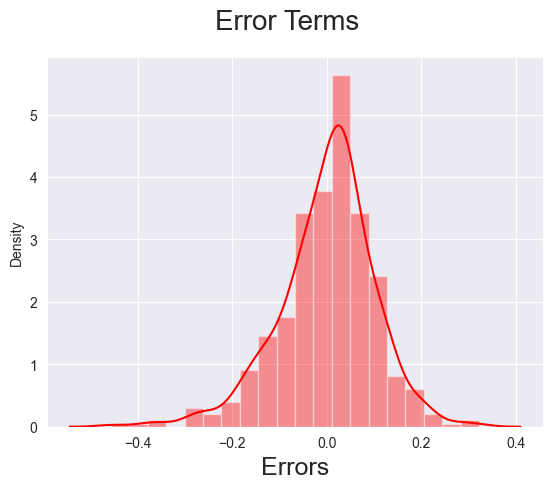

In [111]:
# Plot the histogram of the error or residuals terms terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20, color = 'r')
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18) 

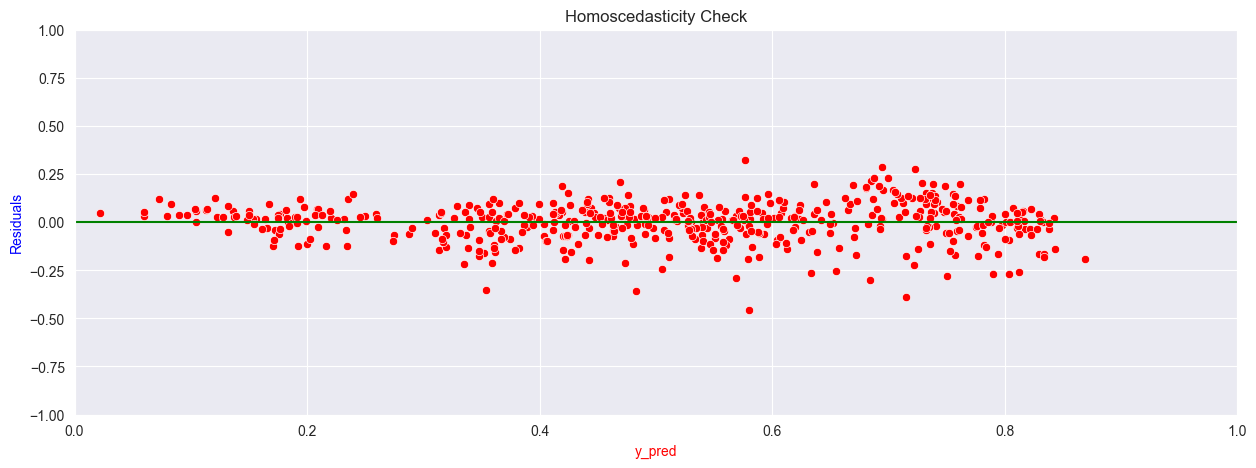

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

# Scatterplot of residuals vs true values
sns.scatterplot(x=y_train_cnt, y=residuals, color="r")

plt.xlabel('y_pred', color='r')
plt.ylabel('Residuals', color='b')
plt.ylim(-1,1)
plt.xlim(0,1)

# Add reference horizontal line at 0
sns.lineplot(x=[0,1], y=[0,0], color='g')

plt.title('Homoscedasticity Check')
plt.show()


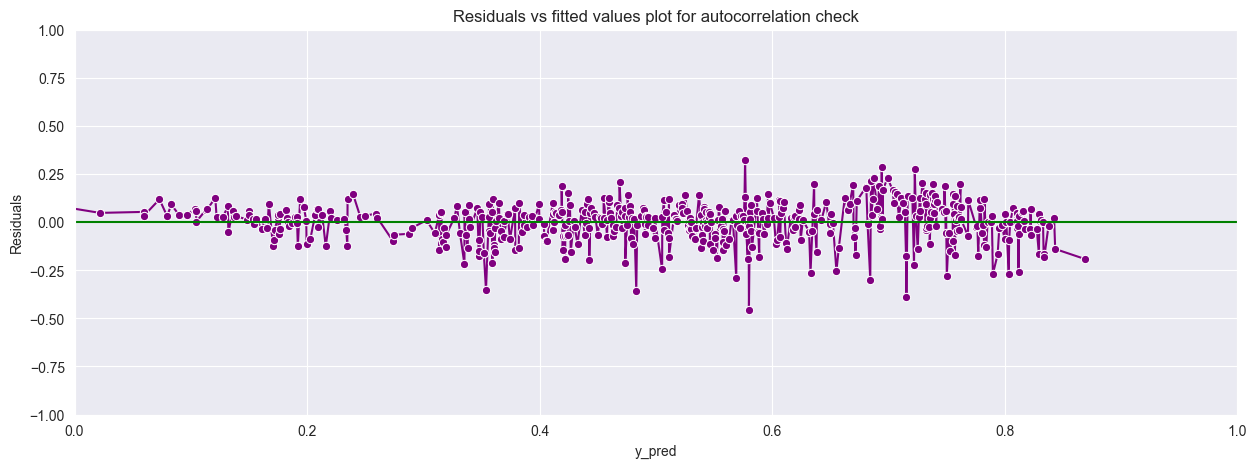

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

# Line plot with markers for residuals vs predicted
sns.lineplot(x=y_train_cnt, y=residuals, marker='o', color='purple')

plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.ylim(-1, 1)
plt.xlim(0, 1)

# Reference line at y=0
sns.lineplot(x=[0,1], y=[0,0], color='green')

plt.title('Residuals vs fitted values plot for autocorrelation check')
plt.show()


In [116]:
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0,0.509887,0.300794,False,False,False
576,1.0,1,0,0.815169,0.264686,False,True,False
426,1.0,1,0,0.442393,0.255342,True,False,False
728,1.0,1,0,0.245101,0.663106,True,False,False
482,1.0,1,0,0.395666,0.188475,False,False,False
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,False,False,False
578,1.0,1,0,0.863973,0.187140,False,False,False
53,1.0,0,0,0.202618,0.111379,True,False,False
350,1.0,0,0,0.248216,0.431816,False,False,False


In [117]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [118]:
# df_test holds the test dataset for us
df_test[var] = scaler.transform(df_test[var])

In [119]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
535,1,0,1,0.901354,0.610133,0.153728,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
299,0,0,1,0.511964,0.837699,0.334206,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
221,0,0,1,0.881625,0.437098,0.339570,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,0,0,1,0.817246,0.314298,0.537414,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False


In [120]:
# Let's check the list 'col2' which had the 7 variables RFE had selected
col2=c.columns
print(len(col2))
col2

7


Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'mnth_Jul',
       'weathersit_C'],
      dtype='object')

In [121]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [122]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    bool   
 6   mnth_Jul       219 non-null    bool   
 7   weathersit_C   219 non-null    bool   
dtypes: bool(3), float64(3), int64(2)
memory usage: 10.9 KB


In [123]:
X_test_rfe2.head()

,const,yr,holiday,temp,windspeed,season_spring,mnth_Jul,weathersit_C
184,1.0,0,1,0.831783,0.084219,False,True,False
535,1.0,1,0,0.901354,0.153728,False,False,False
299,1.0,0,0,0.511964,0.334206,False,False,False
221,1.0,0,0,0.881625,0.339570,False,False,False
152,1.0,0,0,0.817246,0.537414,False,False,False


In [124]:
# Making predictions using our final model: lm3
y_pred = lm3.predict(X_test_rfe2)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

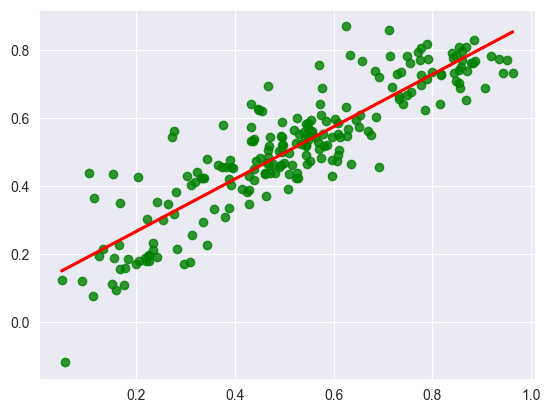

In [125]:

fig = plt.figure()
#plt.scatter(y_test, y_pred)
sns.regplot(x=y_test,y=y_pred, scatter_kws={"color": "green"}, line_kws={"color": "red"});
fig.suptitle('y_test vs y_pred', fontsize = 16, color = 'purple')              # Plot heading 
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                          # Y-label

In [126]:
# r2_score for 8 variables on test dataset and it's predcition
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
print("r2 score is: ",r2_score)
n = len(X_test)
p = 7
print("and Adjusted r2 score is: ",1-(1-r2_score)*(n-1)/(n-p-1))

r2 score is:  0.7835777059426586
and Adjusted r2 score is:  0.7763978194099506


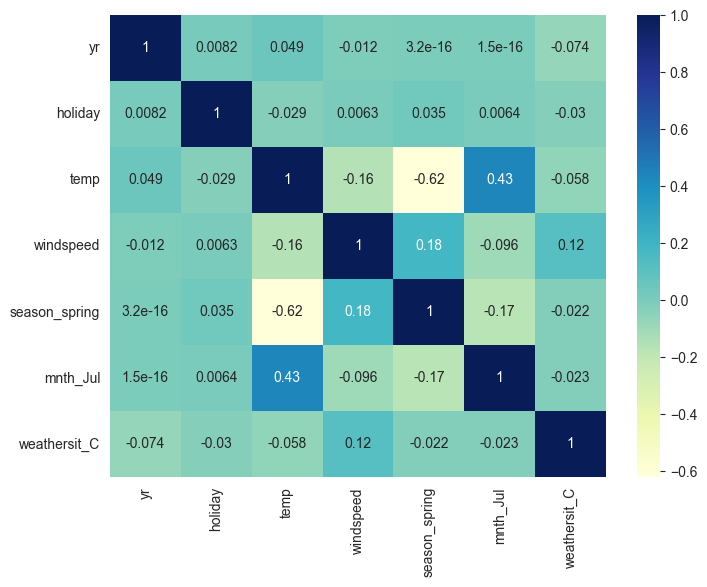

In [127]:
# Figure size
plt.figure(figsize=(8,6))

# Heatmap
sns.heatmap(bike[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [128]:
print(type(lm3.params))
print(abs(lm3.params).sort_values(ascending = False)) # It's magnitude of the coefficinets that matters

<class 'pandas.core.series.Series'>
temp             0.425758
const            0.262712
weathersit_C     0.243368
yr               0.235742
windspeed        0.151936
season_spring    0.140685
holiday          0.074754
mnth_Jul         0.072583
dtype: float64


In [129]:
X_test_rfe2_O = X_test_rfe2.head(1)
X_test_rfe2_O

,const,yr,holiday,temp,windspeed,season_spring,mnth_Jul,weathersit_C
184,1.0,0,1,0.831783,0.084219,False,True,False


In [130]:
X_test_rfe2_C = X_test_rfe2_O.copy()
X_test_rfe2_C

,const,yr,holiday,temp,windspeed,season_spring,mnth_Jul,weathersit_C
184,1.0,0,1,0.831783,0.084219,False,True,False


In [131]:
X_test_rfe2_C.at[184,'yr']= 2
X_test_rfe2_C.at[184,'weathersit_C']= 2
X_test_rfe2_C

,const,yr,holiday,temp,windspeed,season_spring,mnth_Jul,weathersit_C
184,1.0,2,1,0.831783,0.084219,False,True,2


In [132]:
# Making predictions using our final model: lm3
print("cnt for original record is:", lm3.predict(X_test_rfe2_O))
print("cnt for changed record is:", lm3.predict(X_test_rfe2_C))

cnt for original record is: 184    0.456717
dtype: object
cnt for changed record is: 184    0.441464
dtype: object


In [133]:
#End of the assignment